In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
from path_tools import *

In [2]:
inpath = r'T:\Trans Projects\South Lane Wheels TDP\2023'

In [4]:
df = pd.read_csv(inpath+'\\route.csv')

In [5]:
df.head()

,Route,Counts,OriginAddress,OriginCity,DestinationAddress,DestinationCity,OriginAddressFull,DestinationAddressFull,InCityLimit,InCityName,OLongitude,OLatitude,DLongitude,DLatitude
0,"74363 Cottage Grove Reservoir Rd, Cottage Grov...",1,74363 Cottage Grove Reservoir Rd,Cottage Grove,225 W Oregon Ave,Creswell,"74363 Cottage Grove Reservoir Rd, Cottage Grov...","225 W Oregon Ave, Creswell, OR",Completely out,Origin in,-123.069851,43.677661,-123.021261,43.917706
1,"1425 Daugherty, Cottage Grove, OR -- 1200 Hily...",1,1425 Daugherty,Cottage Grove,1200 Hilyard,Eugene,"1425 Daugherty, Cottage Grove, OR","1200 Hilyard, Eugene, OR",Origin in,Origin in,-123.072793,43.792940,-123.082748,44.046332
2,"1661 Hwy 99 N, Cottage Grove, OR -- 3915 River...",1,1661 Hwy 99 N,Cottage Grove,3915 River Rd,Eugene,"1661 Hwy 99 N, Cottage Grove, OR","3915 River Rd, Eugene, OR",Origin in,Origin in,-123.051489,43.807380,-123.138644,44.120621
3,"77500 S 6th St, Cottage Grove, OR -- 3355 Rive...",1,77500 S 6th St,Cottage Grove,3355 Riverbend Dr,Springfield,"77500 S 6th St, Cottage Grove, OR","3355 Riverbend Dr, Springfield, OR",Completely out,Origin in,-123.064983,43.765832,-123.027521,44.082236
4,"77399 Mcdole Rd, Cottage Grove, OR -- 32120 Ra...",1,77399 Mcdole Rd,Cottage Grove,32120 Rachel Rd.#B6,Cottage Grove,"77399 Mcdole Rd, Cottage Grove, OR","32120 Rachel Rd.#B6, Cottage Grove, OR",Completely out,Completely in,-123.082353,43.761151,-123.071594,43.777596


In [6]:
df.shape

(109, 14)

In [7]:
G= ox.graph_from_place('Lane County, Oregon, USA')

In [8]:
n = df.shape[0]-1

In [9]:
df.columns

Index(['Route', 'Counts', 'OriginAddress', 'OriginCity', 'DestinationAddress',
       'DestinationCity', 'OriginAddressFull', 'DestinationAddressFull',
       'InCityLimit', 'InCityName', 'OLongitude', 'OLatitude', 'DLongitude',
       'DLatitude'],
      dtype='object')

In [12]:
route, route_line, gdf = get_shortest_route(orgnm = df.OriginAddressFull[n], 
                                            olon = df.OLongitude[n],
                                            olat = df.OLatitude[n],
                                            dstnm = df.DestinationAddressFull[n],
                                            dlon = df.DLongitude[n],
                                            dlat = df.DLatitude[n], G=G)

420 S 2nd St, Creswell, OR -- 2101 W 10th Ave, Eugene, OR


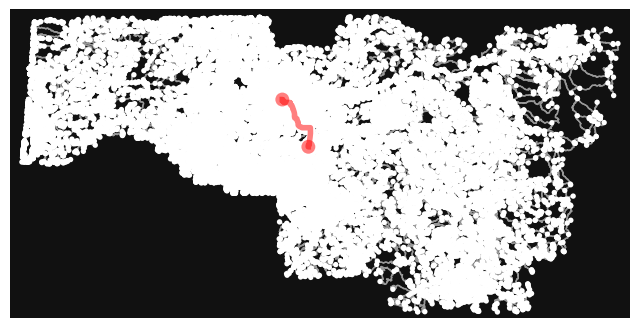

In [13]:
fig, ax = ox.plot_graph_route(G, route)

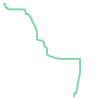

In [14]:
route_line

In [15]:
gdf

,geometry,osm_nodes,length_km,start,end,route
0,"LINESTRING (4257171.081 828782.790, 4256993.48...","[7871610117, 7871610119, 40060127, 9941416874,...",22.146945,"420 S 2nd St, Creswell, OR","2101 W 10th Ave, Eugene, OR","420 S 2nd St, Creswell, OR -- 2101 W 10th Ave,..."


In [ ]:
t0 = time.time()
out = list(df.apply(lambda row: get_shortest_route(row.OriginAddressFull, 
                                                   row.OLongitude, 
                                                   row.OLatitude, 
                                                   row.DestinationAddressFull, 
                                                   row.DLongitude, 
                                                   row.DLatitude, G=G)[2], axis=1))
elapsed = (time.time() - t0) / 60
print('Elapsed time: %.2fminutes' % (elapsed))

74363 Cottage Grove Reservoir Rd, Cottage Grove, OR -- 225 W Oregon Ave, Creswell, OR
1425 Daugherty, Cottage Grove, OR -- 1200 Hilyard, Eugene, OR
1661 Hwy 99 N, Cottage Grove, OR -- 3915 River Rd, Eugene, OR
77500 S 6th St, Cottage Grove, OR -- 3355 Riverbend Dr, Springfield, OR
77399 Mcdole Rd, Cottage Grove, OR -- 32120 Rachel Rd.#B6, Cottage Grove, OR
1515 Village Dr, Cottage Grove, OR -- 1220 Jacobs Dr, Eugene, OR
1620 Bohemia Pl, Cottage Grove, OR -- 1200 Hilyard, Eugene, OR
603 Or-99, Cottage Grove, OR -- 77940 Highway 99 S, Cottage Grove, OR
